In [1]:
import os
import numpy as np
import mne
import osl
import yaml
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [17, 12]

dataset_path = os.path.join('rich_data', 'pilot2', 'maxfiltered', 'task_part1_1_raw_tsss_mc.fif')
outdir = os.path.join('rich_data', 'pilot2', 'oslpy_preproc')

config_text = """
meta:
  event_codes:
    words/hungry: 2
    words/tired: 3
    words/thirsty: 4
    words/toilet: 5
    words/pain: 6
    think: 7
    cue: 8
    error: 10
    twords/hungry: 11
    twords/tired: 12
    twords/thirsty: 13
    twords/toilet: 14
    twords/pain: 15
preproc:
  - {method: filter, l_freq: 1, h_freq: 30}
  - {method: notch_filter, freqs: 50 100 150}
  - {method: bad_channels, picks: 'mag'}
  - {method: bad_channels, picks: 'grad'}
  - {method: bad_channels, picks: 'eeg'}
  - {method: bad_segments, segment_len: 800, picks: 'mag'}
  - {method: bad_segments, segment_len: 800, picks: 'grad'}
  - {method: bad_segments, segment_len: 800, picks: 'eeg'}
  - {method: find_events, min_duration: 0.002}
  - {method: epochs, tmin: -0.4, tmax: 1.6, decim: 10}
"""

"""
  - {method: ica_raw, picks: 'meg', n_components: 64}
  - {method: ica_autoreject, picks: 'meg', ecgmethod: 'correlation'}
"""

"\n  - {method: ica_raw, picks: 'meg', n_components: 64}\n  - {method: ica_autoreject, picks: 'meg', ecgmethod: 'correlation'}\n"

In [4]:
config = yaml.load(config_text, Loader=yaml.FullLoader)
raw = mne.io.read_raw_fif(dataset_path, preload=True)
dataset = osl.preprocessing.run_proc_chain(raw, config, outdir=outdir, overwrite=True)

/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_2871/3948521479.py:2: RuntimeWarning: This filename (rich_data/pilot2/maxfiltered/task_part1_1_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(dataset_path, preload=True)
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/osl/preprocessing/batch.py:490: RuntimeWarning: Log entries will be appended to the file. Use overwrite=False to avoid this message in the future.
  mne.utils._logging.set_log_file(logfile)


2021-12-09 17:24:50 : Starting OSL Processing
input : <Raw | task_part1_1_raw_tsss_mc.fif, 398 x 1703000 (1703.0 s), ~5.06 GB, data loaded>

FILTERING
{'l_freq': 1, 'h_freq': 30}

NOTCH-FILTERING
{'freqs': '50 100 150'}

BAD-CHANNELS
{'picks': 'mag'}
Modality mag - 4/102 channels rejected     (3.921569%)

BAD-CHANNELS
{'picks': 'grad'}
Modality grad - 2/204 channels rejected     (0.980392%)

BAD-CHANNELS
{'picks': 'eeg'}
Modality eeg - 1/60 channels rejected     (1.666667%)

BAD-SEGMENTS
{'segment_len': 800, 'picks': 'mag'}
Modality mag - 7.200000/1703.0 seconds rejected     (0.422783%)

BAD-SEGMENTS
{'segment_len': 800, 'picks': 'grad'}
Modality grad - 23.200000/1703.0 seconds rejected     (1.362302%)

BAD-SEGMENTS
{'segment_len': 800, 'picks': 'eeg'}
Modality eeg - 25.600000/1703.0 seconds rejected     (1.503230%)

FINDING EVENTS
{'min_duration': 0.002}

EPOCHING
{'tmin': -0.4, 'tmax': 1.6, 'decim': 10}


/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/osl/preprocessing/batch.py:471: RuntimeWarning: This filename (rich_data/pilot2/oslpy_preproc/task_part1_1_raw_tsss_mc_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  dataset['epochs'].save(outname, overwrite=overwrite)


2021-12-09 17:25:52 : Processing Complete


In [6]:
# check drop log
for reason in dataset['epochs'].drop_log:
    if reason:
        if reason[0] != 'IGNORED':
            print(reason)

('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_mag',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_eeg',)
('bad_segment_eeg',)
('bad_segment_grad',)
('bad_segment_grad',)
('bad_segment_eeg',)
('bad_segment_mag',)
('bad_segment_eeg',)
('bad_segment_mag',)
('bad_segment_grad',)


1 files to be processed. 1 good
IMPORTING: rich_data/pilot2/oslpy_preproc/resting_before_1_raw_tsss_mc_raw.fif
Opening raw data file rich_data/pilot2/oslpy_preproc/resting_before_1_raw_tsss_mc_raw.fif...
    Range : 5000 ... 323999 =      5.000 ...   323.999 secs
Ready.
Reading 0 ... 318999  =      0.000 ...   318.999 secs...
Reading rich_data/pilot2/oslpy_preproc/resting_before_1_raw_tsss_mc_ica.fif ...
Now restoring ICA solution ...
Ready.
Processing : /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/pilot2/oslpy_preproc/resting_before_1_raw_tsss_mc_raw.fif


/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/osl/report/raw_report.py:152: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.read_ica(infile.replace('raw.fif', 'ica.fif')) # todo: could potentially be incorporated in 'import_data'


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


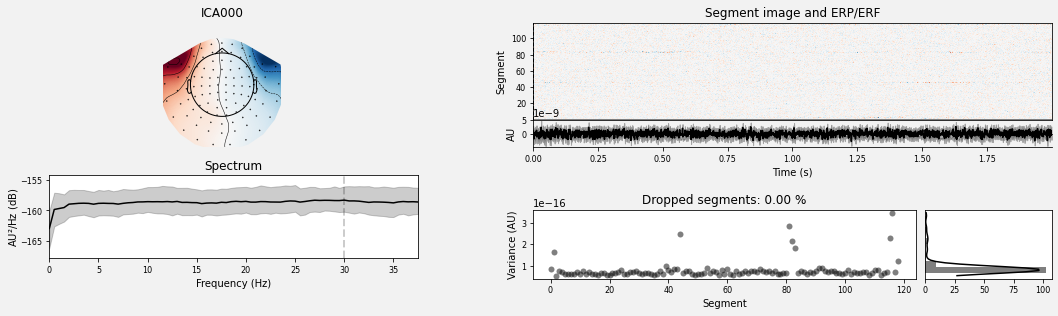

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<Figure size 432x288 with 0 Axes>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<Figure size 432x288 with 0 Axes>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<Figure size 432x288 with 0 Axes>

Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
Setting 42799 of 319000 (13.42%) samples to NaN, retaining 276201 (86.58%) samples.
Effective window size : 2.048 (s)
rich_data/pilot2/oslpy_preproc/osl_raw_report.html


In [2]:
dataset_path = os.path.join('rich_data', 'pilot2', 'oslpy_preproc', 'resting_before_1_raw_tsss_mc_raw.fif')
osl.report.gen_report(dataset_path, outdir=os.path.dirname(dataset_path))

## Epoch analysis

In [5]:
epochs = dataset['epochs']

In [21]:
for i in range(200):
    print(dataset['epochs'][i].event_id)

{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/tired': 3}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'words/pain': 6}
{'cue': 8}
{'words/thirsty': 4}
{'cue': 8}
{'words/toilet': 5}
{'cue': 8}
{'words/hungry': 2}
{'cue': 8}
{'cue': 8}


In [23]:
for i in range(200):
    print(dataset['events'][i])

[93459     0     1]
[94317     0     8]
[95135     0     1]
[95999     0     5]
[96879     0     1]
[97754     0     8]
[98563     0     1]
[99566     0     6]
[100440      0      1]
[101410      0      8]
[102241      0      1]
[103291      0      2]
[104185      0      1]
[105019      0      8]
[105953      0      1]
[106848      0      3]
[107785      0      1]
[108655      0      8]
[109489      0      1]
[131123      0    256]
[133336      0      6]
[134210      0      1]
[135062      0      8]
[135866      0      1]
[136765      0      5]
[137708      0      1]
[138547      0      8]
[139523      0      1]
[140425      0      4]
[141316      0      1]
[142151      0      8]
[143101      0      1]
[144070      0      3]
[144873      0      1]
[145845      0      8]
[146696      0      1]
[147691      0      2]
[148648      0      1]
[149517      0      8]
[150474      0      1]
[151435      0      5]
[152259      0      1]
[153188      0      8]
[154111      0      1]
[155088     

In [11]:
epochs.ch_names

['EOG001',
 'EOG002',
 'ECG003',
 'EMG004',
 'EEG001',
 'EEG002',
 'EEG003',
 'EEG004',
 'EEG005',
 'EEG006',
 'EEG007',
 'EEG008',
 'EEG009',
 'EEG010',
 'EEG011',
 'EEG012',
 'EEG013',
 'EEG014',
 'EEG015',
 'EEG016',
 'EEG017',
 'EEG018',
 'EEG019',
 'EEG020',
 'EEG021',
 'EEG022',
 'EEG023',
 'EEG024',
 'EEG025',
 'EEG026',
 'EEG027',
 'EEG028',
 'EEG029',
 'EEG030',
 'EEG031',
 'EEG032',
 'EEG033',
 'EEG034',
 'EEG035',
 'EEG036',
 'EEG037',
 'EEG038',
 'EEG039',
 'EEG040',
 'EEG041',
 'EEG042',
 'EEG043',
 'EEG044',
 'EEG045',
 'EEG046',
 'EEG047',
 'EEG048',
 'EEG049',
 'EEG050',
 'EEG051',
 'EEG052',
 'EEG053',
 'EEG054',
 'EEG055',
 'EEG056',
 'EEG057',
 'EEG058',
 'EEG059',
 'EEG060',
 'IASX+',
 'IASX-',
 'IASY+',
 'IASY-',
 'IASZ+',
 'IASZ-',
 'IAS_DX',
 'IAS_DY',
 'IAS_X',
 'IAS_Y',
 'IAS_Z',
 'MEG0111',
 'MEG0112',
 'MEG0113',
 'MEG0121',
 'MEG0122',
 'MEG0123',
 'MEG0131',
 'MEG0132',
 'MEG0133',
 'MEG0141',
 'MEG0142',
 'MEG0143',
 'MEG0211',
 'MEG0212',
 'MEG0213',
 'ME

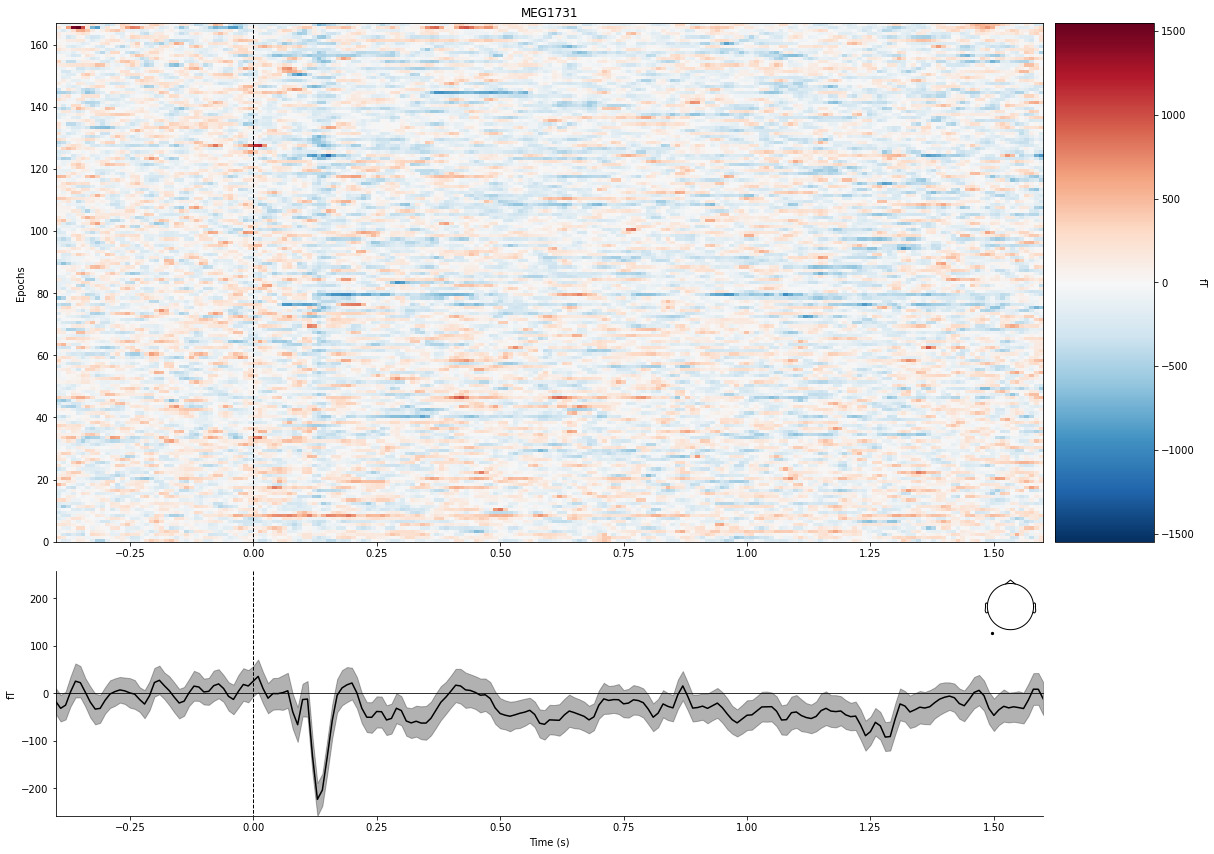

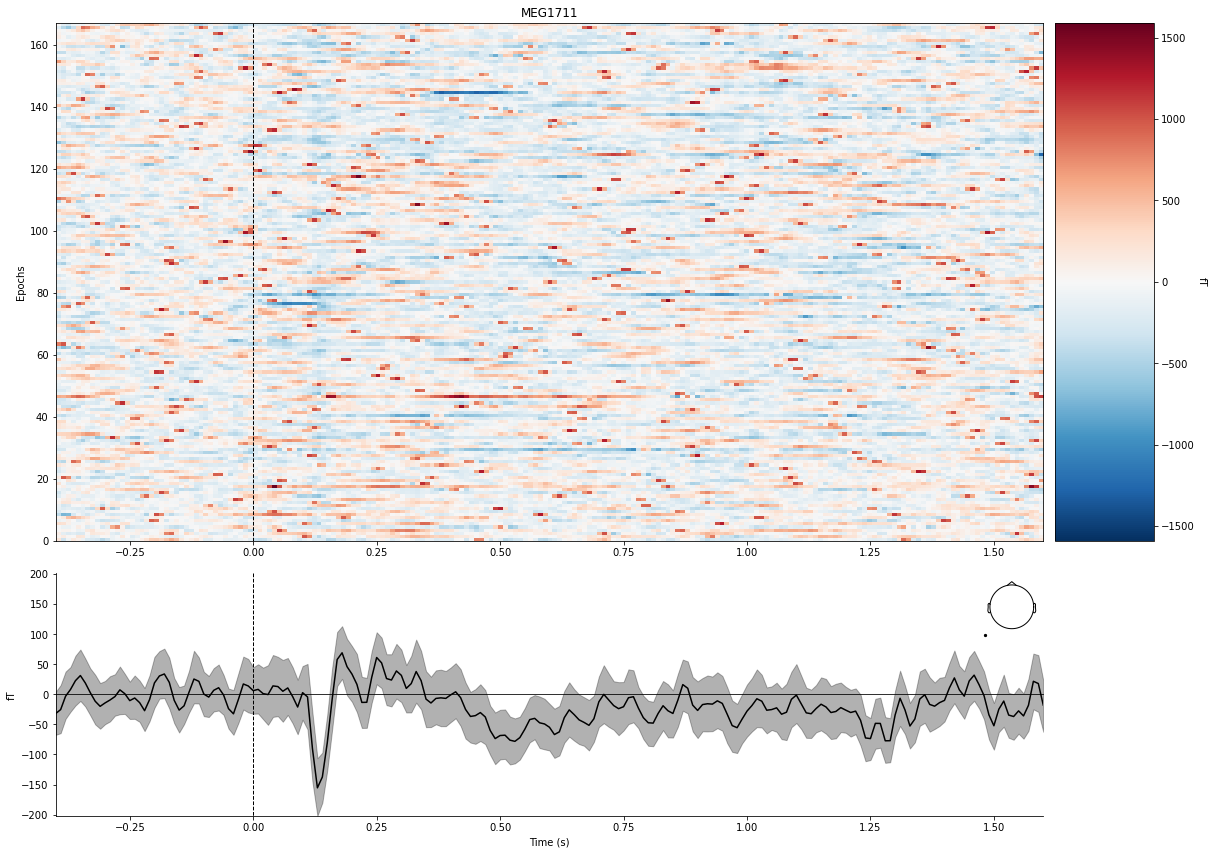

[<Figure size 1224x864 with 4 Axes>]

In [26]:
epochs['words'].plot_image(['MEG1731'])
epochs['words'].plot_image(['MEG1711'])

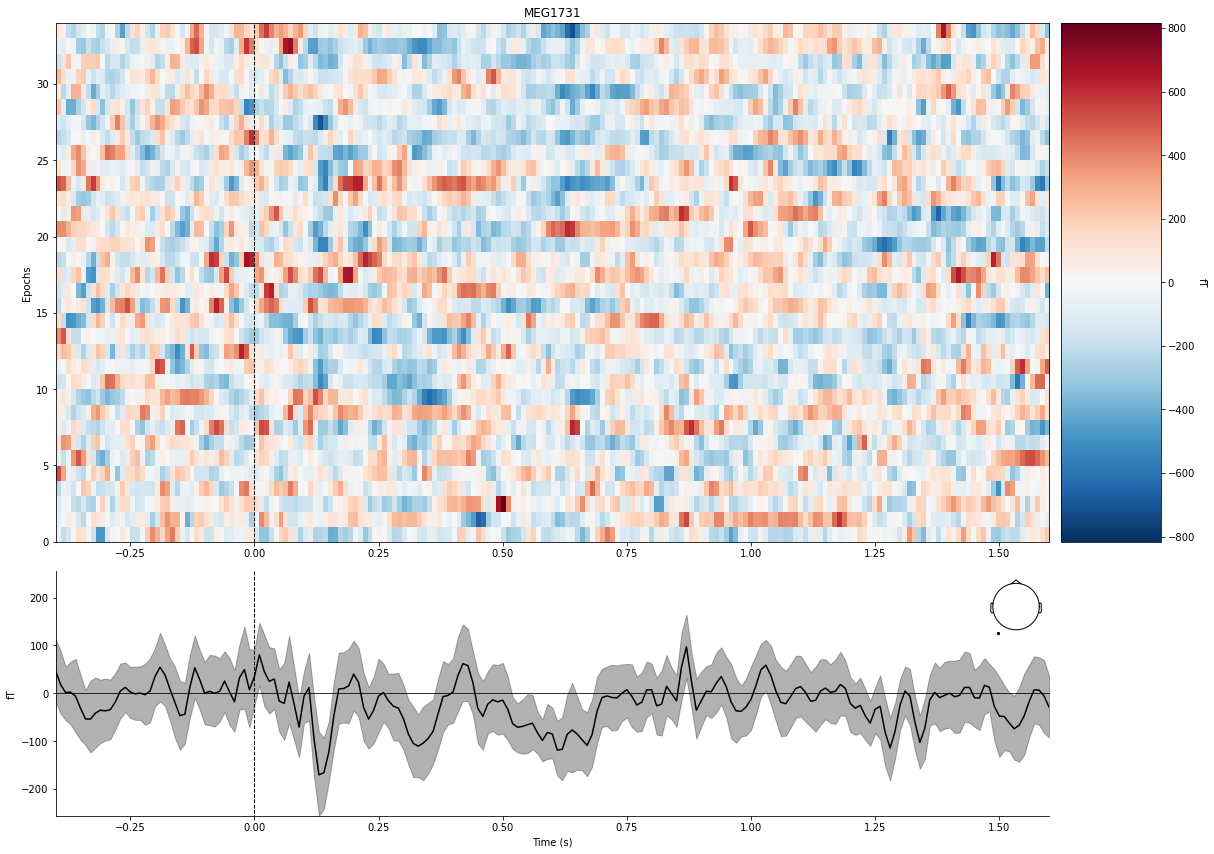

[<Figure size 1224x864 with 4 Axes>]

In [27]:
sensor = 'MEG1731'
epochs['words/tired'].plot_image([sensor])
epochs['words/hungry'].plot_image([sensor])
epochs['words/pain'].plot_image([sensor])
epochs['words/thirsty'].plot_image([sensor])
epochs['words/toilet'].plot_image([sensor])

In [11]:
cue_evoked = epochs['cue'].average()
word_evoked = epochs['words'].average()

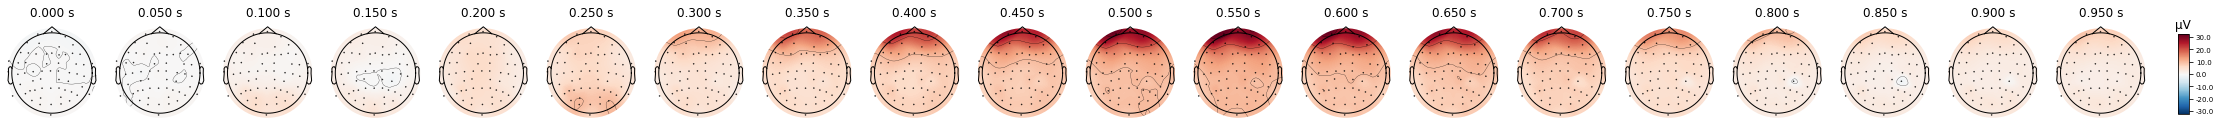

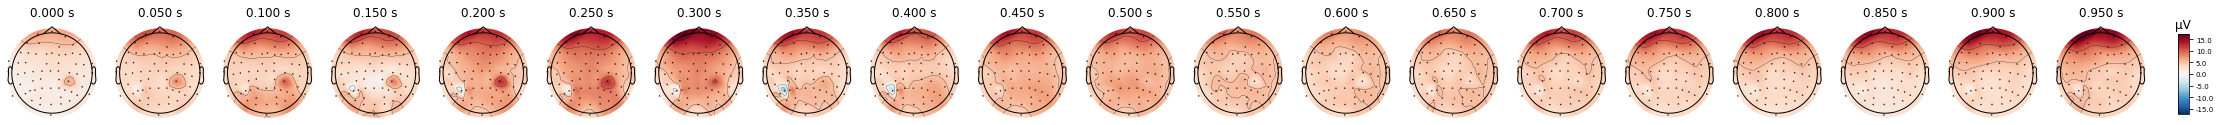

In [12]:
times = np.arange(0,1,0.05)
cue_evoked.plot_topomap(times, ch_type='eeg', average=0.05)
word_evoked.plot_topomap(times, ch_type='eeg', average=0.05)

In [13]:
times = np.arange(0,1,0.05)
cue_evoked.plot_topomap(times, ch_type='mag', average=0.05)
word_evoked.plot_topomap(times, ch_type='mag', average=0.05)

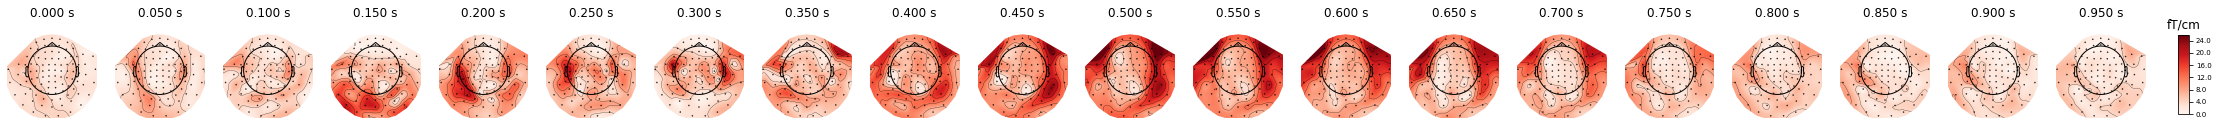

In [14]:
times = np.arange(0,1,0.05)
cue_evoked.plot_topomap(times, ch_type='grad', average=0.05)
word_evoked.plot_topomap(times, ch_type='grad', average=0.05)